In [ ]:
# Installation of MDFT_nn needed
!pip install git+https://github.com/Rahgooy/MDFT.git@master

In [3]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvas
from scipy.spatial import distance
import random
import pickle
from scipy import stats

import bokeh


# allow us to re-use the framework from the src directory
import sys, os
sys.path.append(os.path.abspath(os.path.join('../')))

import max_ent.examples.grid_9_by_9 as G
from max_ent.utility.support import *
from max_ent.gridworld import Directions


random.seed(123)
np.random.seed(123)

Set of constraints

In [4]:
## Set the grid
blue = [21,  9, 59,  1,  0, 20]
green = [42, 18, 76, 41, 23, 30]
cs = [63, 74, 13, 39, 48, 38]
ca = [Directions.DOWN_LEFT, Directions.UP_LEFT]
start =7
goal = 65
constraints = {'blue': blue, 'green': green, 'cs':cs, 'ca':ca}

print(Directions.ALL_DIRECTIONS)

[LEFT, RIGHT, UP, DOWN, UP_LEFT, UP_RIGHT, DOWN_LEFT, DOWN_RIGHT]


To generate random trajectories, you can use functions in max_ent/algorithms/gridworld_icrl.py there you can find procedures to generate random, optimal, and weighted trajectroies.


Generate nominal trajectories and plot them in the grid

[0.9625 0.0625 0.0625 0.9625 0.9625 0.0625 0.9625 0.9625]
{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x1198a0470>}


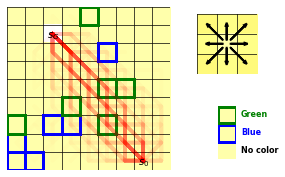

In [5]:
#blue, green, cs, ca, start, goal = generate_constraints(9)
n, n_cfg, demo_n, f1 = create_world('Nominal', blue, green, start=start, goal=goal)

Generate constrained trajectories and plot them in the grid. 
It is possible to change the set of constraints and generate a new set of trajectories with the following:
    
n_cfg = G.config_world(blue, green, cs, ca, cc, goal, start=start)

n = n_cfg.mdp

demo = G.generate_trajectories(n.world, n.reward, n.start, n.terminal, n_trajectories=1)

[0.9625 0.0625 0.0625 0.9625 0.9625 0.0625 0.9625 0.9625]
{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x1198a0470>}


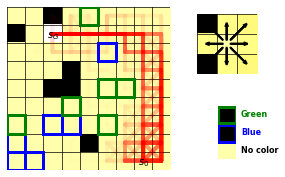

In [6]:
cc = [1, 2]
c, c_cfg, demo_c, f2 = create_world('Constrained', blue, green, cs, ca, cc, start=start, goal=goal, check=True)

MAE(best):  0.972237436171118
MAE(best):  0.759319804482941
MAE(best):  0.698556549709390
MAE(best):  0.489380332682008
MAE(best):  0.453690112112941
Finished with MAE(best):  0.438554615119287
{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x1198a0470>}


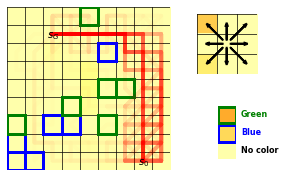

In [7]:
learned_params = G.learn_constraints(n.reward, c.world, c.terminal, demo_c.trajectories)
learned_mdp = G.MDP(c.world, learned_params.reward, c.terminal, c.start)
demo_l = G.generate_trajectories(c.world, learned_params.reward, c.start, c.terminal)
p = G.plot_world('Learned Constrained', learned_mdp, learned_params.state_weights, 
                  learned_params.action_weights, learned_params.color_weights, 
                  demo_l, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)

When you generate a set of trajectories, those are stored in a tuple (i.e., demo_c in this case) where the first element is the set of trajectories and the second element is the policy used to generate the trajectory.

The grid world is an object having functions to compute coords in the grid given the number of the state and vice-versa. You can find the code in max_ent/gridworld/gridworld.py (e.g., state_point_to_index(self, state)). Looking at the code it is possible to see that the first element of the trajectories list is the bottom-left state in the grid.

The list of the actions are stored in the class Directions that is in max_ent/gridworld/gridworld.py 

In [8]:
demo_c.policy[7:8]

array([[1.39341628e-01, 2.74112357e-01, 2.36656394e-01, 2.30495961e-01,
        9.24271317e-20, 6.75068552e-02, 2.41474774e-19, 5.18868048e-02]])

The following code generates an empty set of trajetories so it is possible to plot the constrained grid re-using the existing code. It also saves to pickle files the two sets of policies.

{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x1198a0470>}


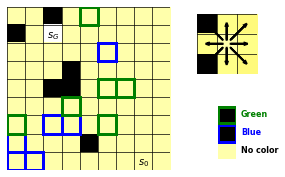

In [9]:
from max_ent.algorithms.gridworld_icrl import Demonstration
demo_test = Demonstration([], demo_c.policy)

import pickle as pkl
import numpy as np

fileName = 'qvalues_constraints'
fileObject = open(fileName, 'wb')
pkl.dump(demo_c.policy, fileObject)
fileObject.close()

fileName = 'qvalues_nominal'
fileObject = open(fileName, 'wb')
pkl.dump(demo_n.policy, fileObject)
fileObject.close()

f1 = G.plot_world(f'MCA', c, c_cfg.state_penalties, 
              c_cfg.action_penalties, c_cfg.color_penalties, 
              demo_test, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)

Load values from pickle

In [10]:
import csv

In [11]:
count_stat = count_states(demo_c.trajectories, c_cfg.mdp, n, constraints, normalize = False)

In [12]:
from mpl_toolkits.mplot3d import Axes3D 

def f():
    Z = []

    for x in range(9):
        temp_grid = []
        for y in range(9):
            #print(f"({x},{y})")
            temp_grid.append(np.sum(count_stat[0][y][8-x]))
            
        #print(temp_grid)
        Z.append(temp_grid)
    return Z

x = [i for i in range(9)] #np.linspace(0, 9, 1)
y = [i for i in range(9)] #np.linspace(0, 9, 1)


_xx, _yy = np.meshgrid(x, y)
x, y = _xx.ravel(), _yy.ravel()
Z = f()


In [13]:
z_survey=[[14 for i in range(9)],
        [11 for i in range(9)],
        [8 for i in range(9)],
        [4 for i in range(9)],
        [6 for i in range(9)],
        [12 for i in range(9)],
    [28 for i in range(9)],
    [21 for i in range(9)],
    [18 for i in range(9)]]
z_survey

[[14, 14, 14, 14, 14, 14, 14, 14, 14],
 [11, 11, 11, 11, 11, 11, 11, 11, 11],
 [8, 8, 8, 8, 8, 8, 8, 8, 8],
 [4, 4, 4, 4, 4, 4, 4, 4, 4],
 [6, 6, 6, 6, 6, 6, 6, 6, 6],
 [12, 12, 12, 12, 12, 12, 12, 12, 12],
 [28, 28, 28, 28, 28, 28, 28, 28, 28],
 [21, 21, 21, 21, 21, 21, 21, 21, 21],
 [18, 18, 18, 18, 18, 18, 18, 18, 18]]

In [14]:
'''fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(new_matrix, cmap='hot', interpolation='nearest')
ax2.imshow(Z, cmap='hot', interpolation='nearest')
plt.show()'''

"fig = plt.figure(figsize=(16, 6))\nax1 = fig.add_subplot(121)\nax2 = fig.add_subplot(122)\nax1.imshow(new_matrix, cmap='hot', interpolation='nearest')\nax2.imshow(Z, cmap='hot', interpolation='nearest')\nplt.show()"

In [15]:
from numpy import genfromtxt
my_data = genfromtxt('survey_1.csv', delimiter=';')

In [16]:
my_data[122][82].is_integer()

False

In [17]:
matrix_from_survey = np.zeros((81, 8))
Directions.ALL_DIRECTIONS

[LEFT, RIGHT, UP, DOWN, UP_LEFT, UP_RIGHT, DOWN_LEFT, DOWN_RIGHT]

In [18]:
def compute_next_state(state,action):
    next_p = n.world.p_transition[state,:,action]
    next_s = range(c.world.n_states)
    next_state = np.random.choice(next_s, p=next_p)
    return next_state

In [19]:
def policy_survey(state):
    #print(state)
    action = random.choice(np.argwhere(matrix_from_survey[state] == np.amax(matrix_from_survey[state])))[0]
    return action

def policy_stochastic_survey(state, verbose = False):
    if verbose: print(matrix_from_survey[state]/np.sum(matrix_from_survey[state]))
    action = np.random.choice(range(8), p=matrix_from_survey[state]/np.sum(matrix_from_survey[state]))
    #action = random.choice(np.argwhere(matrix_from_survey[state] == np.amax(matrix_from_survey[state])))[0]
    return action

In [20]:
matrix_from_survey = np.zeros((81, 8))

for row in my_data[1:]:
    for index,action in enumerate(row):
        if action.is_integer():
            #next_s = compute_next_state(index-1,int(action-1))
            #print(index-1,action-1)
            matrix_from_survey[index-1][int(action-1)] += 1

print(f"\t\t{Directions.ALL_DIRECTIONS, np.argmax(matrix_from_survey[7])}")
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(f"HUMANS: \t{matrix_from_survey[0:1]/15}")
#print(matrix_from_survey[27:36]/15)
print(f"RL: \t\t{demo_c.policy[0:1]}")
#print(f"HUMANS: \t{matrix_from_survey}")

		([LEFT, RIGHT, UP, DOWN, UP_LEFT, UP_RIGHT, DOWN_LEFT, DOWN_RIGHT], 1)
HUMANS: 	[[0.000 0.533 0.133 0.000 0.000 0.333 0.000 0.000]]
RL: 		[[0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000]]


In [21]:
print(matrix_from_survey[7], Directions.ALL_DIRECTIONS, np.argmax(matrix_from_survey[7]))
Directions.ALL_DIRECTIONS

print(policy_survey(7), True)

[2.000 4.000 3.000 0.000 3.000 3.000 0.000 0.000] [LEFT, RIGHT, UP, DOWN, UP_LEFT, UP_RIGHT, DOWN_LEFT, DOWN_RIGHT] 1
1 True


{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x1198a0470>}


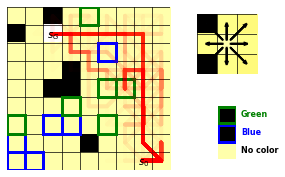

In [22]:
import max_ent.gridworld.trajectory as T
from max_ent.algorithms.gridworld_icrl import Demonstration

demo_optimal_survey = T.generate_trajectories(200, n.world, policy_survey, n.start, n.terminal)
demo_optimal_survey = Demonstration(demo_optimal_survey, policy_survey)
f1 = G.plot_world(f'MCA', c, c_cfg.state_penalties, 
              c_cfg.action_penalties, c_cfg.color_penalties, 
              demo_optimal_survey, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)

In [23]:
demo_mdft = G.generate_mdft_trajectories(n.world, n.reward, learned_params.reward, n.start, n.terminal, [0.2, 0.8])
f1 = G.plot_world(f'MDFT', c, c_cfg.state_penalties, 
              c_cfg.action_penalties, c_cfg.color_penalties, 
              demo_mdft, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)

NameError: name 'demo_mdft' is not defined

{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x1198a0470>}


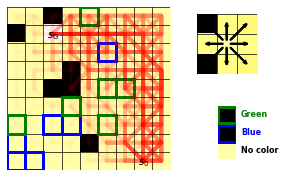

In [24]:

demo_stochastic_survey = T.generate_trajectories(200, n.world, policy_stochastic_survey, n.start, n.terminal)
demo_stochastic_survey = Demonstration(demo_stochastic_survey, policy_stochastic_survey)
f1 = G.plot_world(f'MCA', c, c_cfg.state_penalties, 
              c_cfg.action_penalties, c_cfg.color_penalties, 
              demo_stochastic_survey, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)

In [25]:
cons_matrix = count_states(demo_c.trajectories, c_cfg.mdp, n, constraints, normalize = True)
#mdft_matrix = count_states(demo_mdft.trajectories, c_cfg.mdp, n, constraints, normalize = True)
survey_opt_matrix = count_states(demo_optimal_survey.trajectories, c_cfg.mdp, n, constraints, normalize = True)
survey_stoc_matrix = count_states(demo_stochastic_survey.trajectories, c_cfg.mdp, n, constraints, normalize = True)

#print(survey_opt_matrix[0], mdft_matrix[0])

In [ ]:
import max_ent.examples.grid_9_by_9 as G

js_div = pd.DataFrame()
for i in range(11):
    w = [(i)/10, 1 - (i)/10]
    temp_dict = {}
    print(f"W: {w}")
    demo_mdft = G.generate_mdft_trajectories(n.world, n.reward, c.reward, n.start, n.terminal, w)
    mdft_matrix = count_states(demo_mdft.trajectories, c_cfg.mdp, n, constraints, normalize = True, avoid_impossible = True)
    
    demo_wrl = G.generate_weighted_average_trajectories(c.world, n.reward, c.reward, c.start, c.terminal, w)
    wrl_matrix = count_states(demo_wrl.trajectories, c_cfg.mdp, n, constraints, normalize = True, avoid_impossible = True)
        
    '''print(f"OPT-MDFT:\t {js_divergence(survey_opt_matrix[0], mdft_matrix[0])}\t \
            STO-MDFT:\t {js_divergence(survey_stoc_matrix[0], mdft_matrix[0])}\
          ")
    
    print(f"OPT-WRL:\t {js_divergence(survey_opt_matrix[0], wrl_matrix[0])}\t \
            STO-WRL:\t {js_divergence(survey_stoc_matrix[0], wrl_matrix[0])}\
          \n")'''
    temp_dict['i'] = i
    temp_dict['type'] = 'MDFT'
    temp_dict['value'] = js_divergence(survey_stoc_matrix[0], mdft_matrix[0])
    print(f"STO-MDFT:\t {js_divergence(survey_stoc_matrix[0], mdft_matrix[0])}")
    js_div = pd.concat([js_div, pd.DataFrame(temp_dict)])
    
    print(f"STO-WRL:\t {js_divergence(survey_stoc_matrix[0], wrl_matrix[0])}\n")
    temp_dict['i'] = i
    temp_dict['type'] = 'WA'
    temp_dict['value'] = js_divergence(survey_stoc_matrix[0], wrl_matrix[0])
    
    
    js_div = pd.concat([js_div, pd.DataFrame(temp_dict)])
#f1 = G.plot_world(f'MDFT', c, c_cfg.state_penalties, 
#              c_cfg.action_penalties, c_cfg.color_penalties, 
#              demo_mdft, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)

W: [0.0, 1.0]
Imp. moves/Tot. Trans.: 428/ 4362
Imp. moves/Tot. Trans.: 495/ 4080
STO-MDFT:	 [0.284]
STO-WRL:	 [0.398]

W: [0.1, 0.9]
Imp. moves/Tot. Trans.: 427/ 4514
Imp. moves/Tot. Trans.: 395/ 3903
STO-MDFT:	 [0.267]
STO-WRL:	 [0.349]

W: [0.2, 0.8]
Imp. moves/Tot. Trans.: 394/ 4371
Imp. moves/Tot. Trans.: 251/ 3492
STO-MDFT:	 [0.268]
STO-WRL:	 [0.325]

W: [0.3, 0.7]
Imp. moves/Tot. Trans.: 335/ 4367
Imp. moves/Tot. Trans.: 268/ 3385
STO-MDFT:	 [0.262]
STO-WRL:	 [0.329]

W: [0.4, 0.6]
Imp. moves/Tot. Trans.: 279/ 3944
Imp. moves/Tot. Trans.: 191/ 3126
STO-MDFT:	 [0.275]
STO-WRL:	 [0.336]

W: [0.5, 0.5]
Imp. moves/Tot. Trans.: 257/ 3756
Imp. moves/Tot. Trans.: 130/ 2836
STO-MDFT:	 [0.319]
STO-WRL:	 [0.399]

W: [0.6, 0.4]
Imp. moves/Tot. Trans.: 204/ 3497
Imp. moves/Tot. Trans.: 114/ 2633
STO-MDFT:	 [0.378]
STO-WRL:	 [0.432]

W: [0.7, 0.30000000000000004]


In [ ]:
# calculate the kl divergence
def kl_divergence(p, q):
    p = np.reshape(p, (-1,1))
    q = np.reshape(q, (-1,1))
    return sum(p[i] * math.log2(p[i]/q[i]) for i in range(len(p)))

# calculate the js divergence
def js_divergence(p, q):
    p = np.reshape(p, (-1,1))
    q = np.reshape(q, (-1,1))
    m = 0.5 * (p + q)
    return 0.5 * kl_divergence(p, m) + 0.5 * kl_divergence(q, m)

In [252]:
js_divergence(cons_matrix[0], mdft_matrix[0])

array([0.37585162])

In [253]:
js_divergence(survey_opt_matrix[0], mdft_matrix[0])

array([0.69059947])

In [254]:
js_divergence(survey_stoc_matrix[0], mdft_matrix[0])

array([0.53439776])

In [255]:
js_divergence(cons_matrix[0], survey_opt_matrix[0])

array([0.54060764])

In [256]:
js_divergence(cons_matrix[0], survey_stoc_matrix[0])

array([0.46650716])

In [31]:
js_divergence(survey_stoc_matrix[0], survey_stoc_matrix[0])

array([0.])

In [53]:
from scipy.stats import shapiro, normaltest, anderson, kstest
# normality test
stat, p = shapiro(mdft_matrix[0])
print('Statistics=%.3f, p=%.3f' % (stat, p))
stat, p = kstest(survey_stoc_matrix[0], "uniform") 
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.016, p=0.000
Statistics=1.000, p=0.000


/Users/aloreggia/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [31]:
js_div

,i,type,value
0,0,MDFT,0.292578
0,0,WA,0.390174
0,1,MDFT,0.281487
0,1,WA,0.346240
0,2,MDFT,0.262337
0,2,WA,0.327470
0,3,MDFT,0.270314
0,3,WA,0.331168
0,4,MDFT,0.282993
0,4,WA,0.352679


[<matplotlib.lines.Line2D object at 0x129ec5a20>, <matplotlib.lines.Line2D object at 0x12c8deda0>]


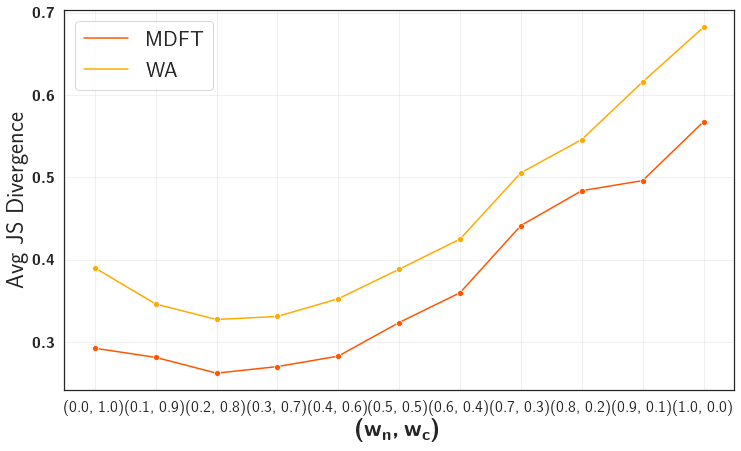

NameError: name 'save_path' is not defined

In [32]:
from matplotlib import rc, rcParams
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
rc('text', usetex=True)
#rc('font', weight='bold')
rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

fig=plt.figure(figsize=(12, 7))
#sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.set_theme(style="whitegrid")
sns.set(font_scale=2)
sns.set_style("white")
#sns.color_palette("viridis", as_cmap=True)
#sns.relplot(x="i", y="avg_vc", hue="type", kind="line", ci="sd", data=df);
#g=sns.relplot(x="i", y=[i[0] for i in df['avg_js_dist']],  kind="line", data=df, palette="Greens", height=7, aspect=2);
g=sns.lineplot(x="i", y='value', data=js_div, hue="type", marker='o', palette="autumn")
g.set_xticklabels([f"({(i)/10:0.1f}, {1 - (i)/10:0.1f})" for i in range(11)])

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
g.set_xticks(range(11)) # <--- set the ticks first

plt.grid(alpha=0.3)

legend_labels, _= g.get_legend_handles_labels()
print(legend_labels)
g.legend(legend_labels, ['MDFT', 'WA'])

plt.xlabel(r'\textbf{$(w_n, w_c)$}')
plt.ylabel("Avg JS Divergence")
plt.show()
fig.savefig(os.path.join(save_path, f"avg_js_dist.png"), bbox_inches = 'tight') 